![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples//colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_covid_19.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class COVID19 Sentiment Classifier Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 

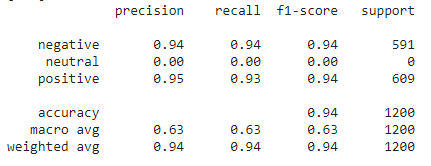


You can achieve these results or even better on this dataset with test  data  : 

<br>

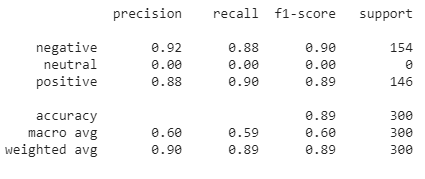

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 08:06:46--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 08:06:46 (56.0 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 75kB/s 
     |████████████████████████████████| 153kB 39.1MB/s 
     |████████████████████████████████| 204kB 21.6MB/s 
     |████████████████████████████████| 204kB 44.5MB/s 


# 2. Download Coivd19 NLP Text Sentiemnt Classifcation    dataset 
https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
#Context

This is a Dataset made of tweets about coivid 19 

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Corona_NLP_train_multi_lingual.csv

--2021-05-05 08:08:46--  http://ckl-it.de/wp-content/uploads/2021/02/Corona_NLP_train_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 838005 (818K) [text/csv]
Saving to: ‘Corona_NLP_train_multi_lingual.csv’

Corona_NLP_train_mu 100%[===================>] 818.36K  1.27MB/s    in 0.6s    

2021-05-05 08:08:47 (1.27 MB/s) - ‘Corona_NLP_train_multi_lingual.csv’ saved [838005/838005]



In [ ]:
import pandas as pd
train_path = '/content/Corona_NLP_train_multi_lingual.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
555,@udaygosalia2002 @FlyFrontier That's horrible ...,negative
444,ThatÂs such an awesome idea! Through the #cor...,positive
350,https://t.co/UcxIQz49vU: Buying Choices: Effic...,positive
383,Thought the period of 'hamstering' was over in...,positive
1053,"Online shopping is booming, but warehouse work...",negative
...,...,...
1493,Northland residents urged not to panic after s...,positive
1301,ÂWe can all now see that jobs that are never ...,negative
141,So many Canadians were extremely ill prepared ...,negative
773,The plummeting gas prices are due to a kind of...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['trainable_sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['sentiment']))

predsS

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.94      0.94      0.94       591
     neutral       0.00      0.00      0.00         0
    positive       0.95      0.93      0.94       609

    accuracy                           0.94      1200
   macro avg       0.63      0.63      0.63      1200
weighted avg       0.94      0.94      0.94      1200



,text,sentence,trained_sentiment,origin_index,y,sentence_embedding_labse,trained_sentiment_confidence,document
0,@udaygosalia2002 @FlyFrontier That's horrible ...,[@udaygosalia2002 @FlyFrontier That's horrible...,negative,555,negative,"[-0.009500819258391857, -0.0515713132917881, -...",1.000000,@udaygosalia2002 @FlyFrontier That's horrible ...
1,ThatÂs such an awesome idea! Through the #cor...,"[ThatÂs such an awesome idea!, Through the #c...",positive,444,positive,"[0.01753036119043827, -0.013980614952743053, 0...",1.000000,ThatÂs such an awesome idea! Through the #cor...
2,https://t.co/UcxIQz49vU: Buying Choices: Effic...,[https://t.co/UcxIQz49vU: Buying Choices: Effi...,positive,350,positive,"[0.026550117880105972, -0.009575911797583103, ...",0.999927,https://t.co/UcxIQz49vU: Buying Choices: Effic...
3,Thought the period of 'hamstering' was over in...,[Thought the period of 'hamstering' was over i...,positive,383,positive,"[0.049093276262283325, -0.05199237912893295, -...",0.967601,Thought the period of 'hamstering' was over in...
4,"Online shopping is booming, but warehouse work...","[Online shopping is booming, but warehouse wor...",negative,1053,negative,"[-0.044845301657915115, -0.0010483426740393043...",1.000000,"Online shopping is booming, but warehouse work..."
...,...,...,...,...,...,...,...,...
1195,Northland residents urged not to panic after s...,[Northland residents urged not to panic after ...,positive,1493,positive,"[-0.0108554782345891, -0.005432534962892532, 0...",0.980916,Northland residents urged not to panic after s...
1196,ÂWe can all now see that jobs that are never ...,[ÂWe can all now see that jobs that are never...,negative,1301,negative,"[-0.002810274949297309, 0.019298763945698738, ...",1.000000,ÂWe can all now see that jobs that are never ...
1197,So many Canadians were extremely ill prepared ...,[So many Canadians were extremely ill prepared...,negative,141,negative,"[0.047991253435611725, -0.03192431479692459, -...",1.000000,So many Canadians were extremely ill prepared ...
1198,The plummeting gas prices are due to a kind of...,[The plummeting gas prices are due to a kind o...,negative,773,positive,"[-0.009237667545676231, -0.05268627777695656, ...",1.000000,The plummeting gas prices are due to a kind of...


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))


              precision    recall  f1-score   support

    negative       0.92      0.88      0.90       154
     neutral       0.00      0.00      0.00         0
    positive       0.88      0.90      0.89       146

    accuracy                           0.89       300
   macro avg       0.60      0.59      0.60       300
weighted avg       0.90      0.89      0.89       300



# 4. Test Model  on 20 languages!

In [ ]:
train_df = pd.read_csv("/content/Corona_NLP_train_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.93      0.86      0.89        44
     neutral       0.00      0.00      0.00         0
    positive       0.91      0.93      0.92        56

    accuracy                           0.90       100
   macro avg       0.61      0.60      0.60       100
weighted avg       0.92      0.90      0.91       100



,text,sentence,trained_sentiment,origin_index,y,sentence_embedding_labse,trained_sentiment_confidence,document
0,#Cheerios Hersteller @GeneralMills hat am Mitt...,[#Cheerios Hersteller @GeneralMills hat am Mit...,positive,0,positive,"[0.009235107339918613, -0.05358916521072388, 0...",0.999428,#Cheerios Hersteller @GeneralMills hat am Mitt...
1,ต้องไปเยี่ยมชมเมื่อเช้านี้ซึ่งพวกเขาได้เปลี่ยน...,[ต้องไปเยี่ยมชมเมื่อเช้านี้ซึ่งพวกเขาได้เปลี่ย...,positive,1,positive,"[-0.0758102685213089, 0.023602206259965897, -0...",1.000000,ต้องไปเยี่ยมชมเมื่อเช้านี้ซึ่งพวกเขาได้เปลี่ยน...
2,मुझे पहली बार Covid-19 के लक्षण होने के कारण ए...,[मुझे पहली बार Covid-19 के लक्षण होने के कारण ...,negative,2,negative,"[0.0010585618438199162, 0.014147249981760979, ...",0.999945,मुझे पहली बार Covid-19 के लक्षण होने के कारण ए...
3,公元前2周的封锁期间更有可能死于饥饿，由于恐慌的买家，我们没有食物了。 ＃新冠病毒,[公元前2周的封锁期间更有可能死于饥饿，由于恐慌的买家，我们没有食物了。 ＃新冠病毒],negative,3,negative,"[-0.01255110278725624, 0.034000057727098465, 0...",1.000000,公元前2周的封锁期间更有可能死于饥饿，由于恐慌的买家，我们没有食物了。 ＃新冠病毒
4,Don't move around unnecessary \r\r\r\nStay at...,"[Don't move around unnecessary Stay at home., ...",positive,4,positive,"[-0.02680176869034767, -0.006846072152256966, ...",1.000000,Don't move around unnecessary Stay at home. Us...
...,...,...,...,...,...,...,...,...
95,Киберкылмышты жөнөкөйлөштүрүү максатында COVID...,[Киберкылмышты жөнөкөйлөштүрүү максатында COVI...,negative,95,negative,"[-0.016219787299633026, -0.07136883586645126, ...",0.999979,Киберкылмышты жөнөкөйлөштүрүү максатында COVID...
96,"Ich bin alles dafür, die Kurve zu glätten und ...","[Ich bin alles dafür, die Kurve zu glätten und...",negative,96,negative,"[-0.054645996540784836, -0.028411103412508965,...",1.000000,"Ich bin alles dafür, die Kurve zu glätten und ..."
97,איר זוכט צו רעדן צו עמעצער וואָס אַרבעט אין אַ...,[איר זוכט צו רעדן צו עמעצער וואָס אַרבעט אין א...,positive,97,positive,"[-0.0533565990626812, -0.020032547414302826, -...",1.000000,איר זוכט צו רעדן צו עמעצער וואָס אַרבעט אין אַ...
98,Comment les bureaux de poste gèrent le boom de...,[Comment les bureaux de poste gèrent le boom d...,positive,98,positive,"[-0.01647104136645794, -0.004591754637658596, ...",0.999770,Comment les bureaux de poste gèrent le boom de...


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# german for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 Menschen starben heute an COVID 19 !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[5000 Menschen starben heute an COVID 19 !!],negative,0,"[-0.026059195399284363, -0.023131363093852997,...",0.999989,5000 Menschen starben heute an COVID 19 !!


In [ ]:
# german for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Wir haben endlich ein Heilmittel gegen COVID gefunden !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[Wir haben endlich ein Heilmittel gegen COVID ...,positive,0,"[-0.01908278465270996, -0.04215678572654724, -...",0.755457,Wir haben endlich ein Heilmittel gegen COVID g...


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000人因今天的Covid 19人死了！ ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[5000人因今天的Covid 19人死了！],negative,0,"[-0.00861808005720377, -0.013505449518561363, ...",0.999903,5000人因今天的Covid 19人死了！


In [ ]:
# Chinese for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("我们终于找到了治愈COVID的方法！ ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[我们终于找到了治愈COVID的方法！],positive,0,"[-0.01916874386370182, -0.0637722760438919, -0...",0.990226,我们终于找到了治愈COVID的方法！


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
#  Turkish for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("Bugün Covid 19 yüzünden 5000 kişi öldü !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,"[Bugün Covid 19 yüzünden 5000 kişi öldü !, !]",negative,0,"[-0.019384179264307022, -0.01711968146264553, ...",0.999918,Bugün Covid 19 yüzünden 5000 kişi öldü !!


In [ ]:
#  Turkish for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Sonunda COVID'e bir tedavi bulduk !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,"[Sonunda COVID'e bir tedavi bulduk !, !]",positive,0,"[-0.02832956612110138, -0.05583051219582558, -...",0.83334,Sonunda COVID'e bir tedavi bulduk !!


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Hebrew  for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("Bugün Covid 19 yüzünden 5000 kişi öldü !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,"[Bugün Covid 19 yüzünden 5000 kişi öldü !, !]",negative,0,"[-0.019384179264307022, -0.01711968146264553, ...",0.999918,Bugün Covid 19 yüzünden 5000 kişi öldü !!


In [ ]:
# Hebrew for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("סוף סוף מצאנו תרופה ל- COVID !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[סוף סוף מצאנו תרופה ל- COVID !!],positive,0,"[-0.038195837289094925, -0.05654338747262955, ...",0.795063,סוף סוף מצאנו תרופה ל- COVID !!


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("COVID 19 की वजह से 5000 लोग मारे गए !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,"[COVID 19 की वजह से 5000 लोग मारे गए !, !]",negative,0,"[-0.013016731478273869, -0.03924949839711189, ...",0.999977,COVID 19 की वजह से 5000 लोग मारे गए !!


In [ ]:
# hindi for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("हम अंत में कोविद को एक इलाज मिला !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[हम अंत में कोविद को एक इलाज मिला !!],positive,0,"[-0.04375814273953438, -0.05282781273126602, -...",0.992187,हम अंत में कोविद को एक इलाज मिला !!


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("COVID 19 аркасында 5000 кеше үлде Бүген !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[COVID 19 аркасында 5000 кеше үлде Бүген !!],negative,0,"[-0.02741607092320919, -0.032239750027656555, ...",0.999982,COVID 19 аркасында 5000 кеше үлде Бүген !!


In [ ]:
	
# Tartar for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Ниһаять, без COVID өчен дәвалау таптык !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,"[Ниһаять, без COVID өчен дәвалау таптык !!]",positive,0,"[-0.04030879586935043, -0.05435317009687424, -...",0.99665,"Ниһаять, без COVID өчен дәвалау таптык !!"


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
	
# French for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 personnes sont mortes à cause du COVID 19 aujourd'hui !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[5000 personnes sont mortes à cause du COVID 1...,negative,0,"[-0.025422221049666405, -0.04044010490179062, ...",0.999976,5000 personnes sont mortes à cause du COVID 19...


In [ ]:
# French for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Nous avons finalement trouvé un remède à Covid !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[Nous avons finalement trouvé un remède à Covi...,positive,0,"[-0.03685027360916138, -0.04665076732635498, -...",0.746119,Nous avons finalement trouvé un remède à Covid !!


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("ទីបំផុតយើងបានរកឃើញការព្យាបាលដើម្បី covid !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,"[ទីបំផុតយើងបានរកឃើញការព្យាបាលដើម្បី covid !, !]",positive,0,"[-0.029317181557416916, -0.054831378161907196,...",0.997803,ទីបំផុតយើងបានរកឃើញការព្យាបាលដើម្បី covid !!


In [ ]:
# Khmer for: 'Many people faced depression because of the virus '
fitted_pipe.predict("មនុស្សជាច្រើនប្រឈមនឹងជំងឺធ្លាក់ទឹកចិត្តដោយសារតែវីរុស")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[មនុស្សជាច្រើនប្រឈមនឹងជំងឺធ្លាក់ទឹកចិត្តដោយសារ...,negative,0,"[0.010295538231730461, -0.045677751302719116, ...",0.999991,មនុស្សជាច្រើនប្រឈមនឹងជំងឺធ្លាក់ទឹកចិត្តដោយសារត...


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
# Yiddish for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 מענטשן געשטארבן ווייַל פון COVID 19 הייַנט !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[5000 מענטשן געשטארבן ווייַל פון COVID 19 הייַ...,negative,0,"[-0.026097219437360764, -0.03218626603484154, ...",0.999871,5000 מענטשן געשטארבן ווייַל פון COVID 19 הייַנ...


In [ ]:
# Yiddish for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("מיר לעסאָף געפֿונען אַ היילונג צו קאָוויד !! ")

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[מיר לעסאָף געפֿונען אַ היילונג צו קאָוויד !!],positive,0,"[-0.04493892937898636, -0.054013777524232864, ...",0.999837,מיר לעסאָף געפֿונען אַ היילונג צו קאָוויד !!


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
	
# Kygrgyz for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("COVID 19дун айынан 5000 адам каза болду !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[COVID 19дун айынан 5000 адам каза болду !!],negative,0,"[-0.019092926755547523, -0.039794765412807465,...",0.99999,COVID 19дун айынан 5000 адам каза болду !!


In [ ]:
# Kygrgyz for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("Акыры, ковидди айыктырдык !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,"[Акыры, ковидди айыктырдык !!]",positive,0,"[-0.03051360882818699, -0.06864563375711441, -...",0.95901,"Акыры, ковидди айыктырдык !!"


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: '5000 people died because of COVID19 Today!!'
fitted_pipe.predict("5000 பேர் இன்று Covid 19 இன்று இறந்தனர் !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[5000 பேர் இன்று Covid 19 இன்று இறந்தனர் !!],negative,0,"[-0.025186121463775635, -0.024766698479652405,...",0.999845,5000 பேர் இன்று Covid 19 இன்று இறந்தனர் !!


In [ ]:
# Tamil for: 'We finally found a cure to COVID!!'
fitted_pipe.predict("COVID க்கு ஒரு தீர்வைக் கண்டுபிடித்தோம் !! ")
	

,sentence,trained_sentiment,origin_index,sentence_embedding_labse,trained_sentiment_confidence,document
0,[COVID க்கு ஒரு தீர்வைக் கண்டுபிடித்தோம் !!],positive,0,"[-0.025669310241937637, -0.055228717625141144,...",0.938791,COVID க்கு ஒரு தீர்வைக் கண்டுபிடித்தோம் !!


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Everything is under control !')
preds

,document,text,sentence_embedding_from_disk,sentiment_confidence,origin_index,sentiment,sentence
0,Everything is under control !,Everything is under control !,"[[-0.028107844293117523, -0.06088888645172119,...",[0.99999535],8589934592,[positive],[Everything is under control !]


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')              | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.annotators.sentence_detect